# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

K-Means Clustering merupakan metode pengelompokan data yang bertujuan memisahkan data ke dalam beberapa kelompok (cluster) berdasarkan kemiripan fitur. Data dengan karakteristik serupa akan ditempatkan dalam satu kelompok, sementara data yang berbeda akan dikelompokkan ke dalam klaster lain. Proses pengelompokan ini menggunakan centroid (titik pusat) sebagai referensi dalam menentukan keanggotaan tiap data pada suatu klaster. Tujuannya adalah untuk memastikan bahwa data yang memiliki kesamaan berada dalam kelompok yang sama, dan data yang berbeda tersebar di kelompok yang berbeda.


## **Manfaat *Clustering***


* Clustering berperan penting dalam segmentasi data, yang sangat bermanfaat untuk analisis dan pemecahan berbagai masalah bisnis, seperti segmentasi pelanggan, strategi pemasaran, dan pemetaan wilayah.

* Juga digunakan dalam pengenalan objek di berbagai bidang seperti computer vision dan image processing.

Hasil clustering yang optimal akan menunjukkan tingkat kemiripan yang tinggi antar anggota dalam satu klaster, dan perbedaan yang signifikan antar klaster yang berbeda. Kesamaan yang dimaksud dinilai secara numerik, di mana dua objek dianggap semakin mirip jika nilai ukurannya semakin dekat. Sebaliknya, semakin besar perbedaan nilai, maka semakin rendah tingkat kesamaan. Oleh karena itu, kualitas clustering sangat ditentukan oleh metode yang digunakan.

##**Inertia (Sum of Squared Error/SSE)**


Dalam algoritma K-Means Clustering, inertia atau SSE (Sum of Squared Error) merupakan salah satu ukuran evaluasi yang digunakan untuk menentukan seberapa baik pengelompokan data ke dalam klaster. Metrik ini menghitung total jumlah kuadrat jarak antara setiap data dengan pusat klaster (centroid) tempat data tersebut tergabung.

Rumus dari inertia adalah:


**Inertia
=
∑
𝑖
=
1
𝑛
∥
𝑥
𝑖
−
𝜇
𝑐
𝑖
∥
2
Inertia=
i=1
∑
n
​
 ∥x
i
​
 −μ
c
i
∥
2**


**Penjelasan Notasi**

* x
i
​
 : Titik data ke-
𝑖
i

* 𝜇
𝑐
𝑖
μ
c
i : Titik pusat (centroid) dari klaster yang berisi
𝑥
𝑖
x
i
​
* ∥
𝑥
𝑖
−
𝜇
𝑐
𝑖
∥
2
∥x
i
​
 −μ
c
i 2: Jarak kuadrat antara data
𝑥
𝑖
x
i
​
  dan centroid-nya menggunakan jarak Euclidean

* 𝑛
n: Total jumlah dat



## **Silhouette Analysis**

Silhouette Analysis adalah metode evaluasi yang sering dianggap lebih informatif dibandingkan inertia dalam menilai kualitas hasil clustering, terutama pada algoritma seperti K-Means. Ini karena metrik ini memperhitungkan dua aspek penting sekaligus:

* Kepadatan internal dalam klaster (cohesion)

* Jarak antar klaster yang berbeda (separation)

Silhouette Analysis menilai sejauh mana sebuah titik data cocok berada dalam klaster tempatnya berada dibandingkan dengan klaster terdekat lainnya. Rumus yang digunakan adalah:


$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


**Penjelasan Notasi**:
* 𝑎
(
𝑖
)
a(i): Rata-rata jarak dari titik
𝑖
i ke seluruh titik lain dalam klaster yang sama (ukuran kohesi).

* 𝑏
(
𝑖
)
b(i): Rata-rata jarak dari titik
𝑖
i ke semua titik dalam klaster terdekat yang bukan klasternya (ukuran pemisahan).

* 𝑠
(
𝑖
)
s(i): Nilai silhouette untuk titik
𝑖
i, berkisar antara -1 hingga 1.


**Interpretasi Nilai s(i):**
* 𝑠
(
𝑖
)
s(i):
𝑠
(
𝑖
)
≈
1
s(i)≈1: Titik sangat sesuai dengan klasternya dan jauh dari klaster lain.

* 𝑠
(
𝑖
)
≈
0
s(i)≈0: Titik berada di batas antara dua klaster.

* 𝑠
(
𝑖
)
≈
−
1
s(i)≈−1: Titik mungkin dikelompokkan ke klaster yang salah.



Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah data keseluruhan
- $S$: Skor rata-rata silhouette dari seluruh titik data


## **Implementasi dengan menggunakan data Iris**

In [ ]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00


## **Library yang digunakan**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [ ]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-29vania-vaniaptr008-f94a.k.aivencloud.com",
        user="avnadmin",
        password="AVNS_jN7GWD4QIOAFWBZiFM2",
        database="defaultdb",
        port=12525
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")  # Pastikan tabel ini ada!
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-25907135-mysqql.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_-_iUzbq84ojauwfvOBS",
        database="defaultdb",
        port=12005
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_mysql")  # Pastikan tabel ini ada!
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          14.0          2.0          51.0         35.0
  2     Iris-setosa          14.0          2.0          49.0         30.0
  3     Iris-setosa          13.0          2.0          47.0         32.0
  4     Iris-setosa          15.0          2.0          46.0         31.0
  5     Iris-setosa          14.0          2.0           5.0         36.0
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1          94.0          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)

print(X_scaled)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.20363851 -0.14015855 -0.22594879 -0.15842908]
 [ 2.85093916  1.96221965  3.16328299  2.21800714]]
Akurasi (Adjusted Rand Score): 0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.34755702 -0.33079677 -0.23971791 -0.23892785]
 [ 2.3185641   1.57512571  2.60161181  2.82089167]
 [ 1.48336107  2.10088017 -0.07046978 -0.31880571]]
Akurasi (Adjusted Rand Score): 0.015

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.34791656 -0.33097495 -0.24018422 -0.26723297]
 [ 2.85093916  1.96221965  3.16328299  2.21800714]
 [ 1.48336107  2.10088017 -0.07046978 -0.31880571]
 [-0.32962547 -0.34301146 -0.19815023  4.999382  ]]
Akurasi (Adjusted Rand Score): 0.014
[[ 2.1228581   2.43886518  0.43043042 -0.16819972]
 [ 2.01337223  2.00555106  0.43043042 -0.16819972]
 [ 1.90388635  2.17887671  0.35676862 -0.16819972]
 [ 1.84914342  2.09221389  0.50409221 -0.16819972]
 [-0.39531699  2.52552801  0.43043042 -0.16819972]
 [-0.37341982 -0.25634863 -0.47560965 -0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

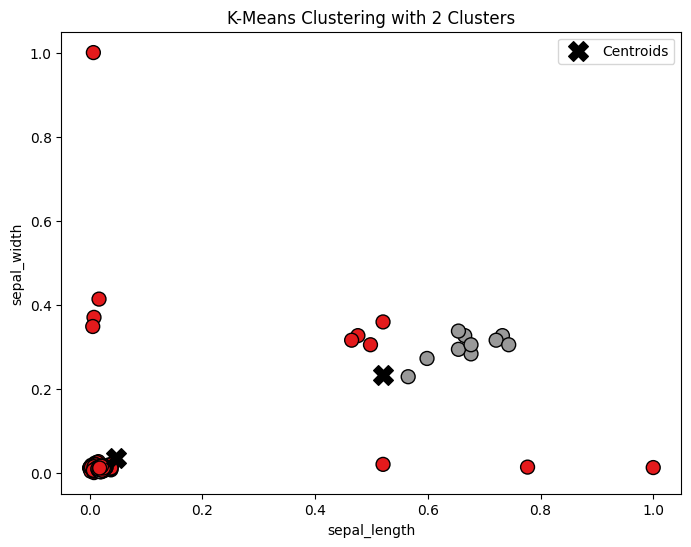

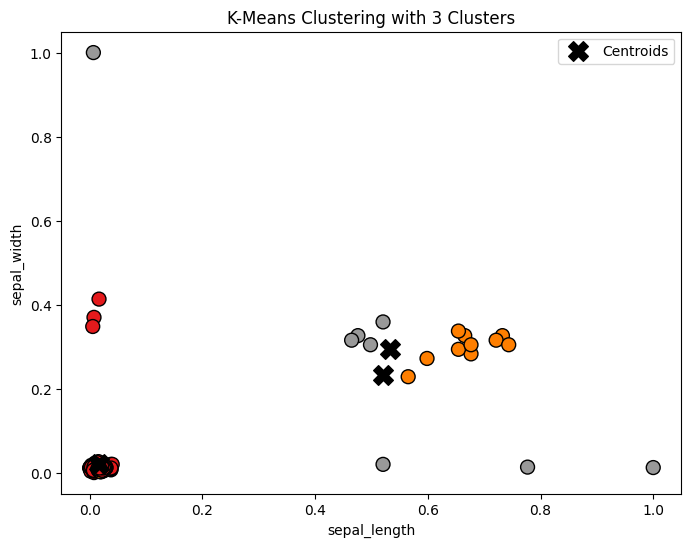

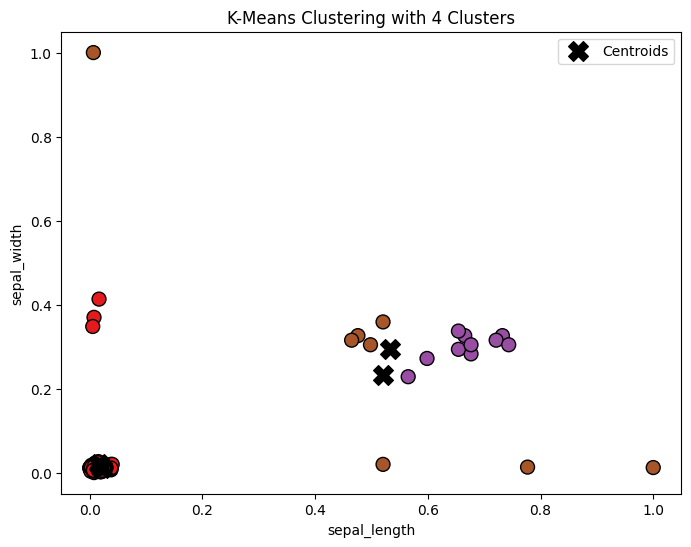

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


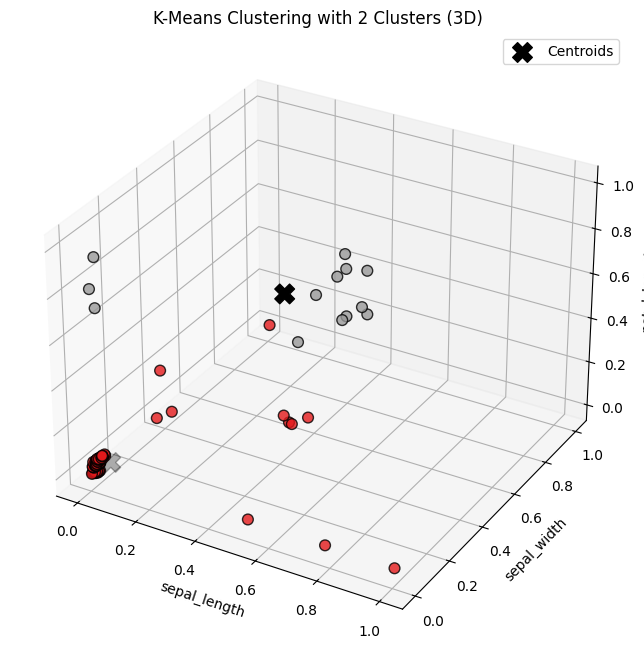

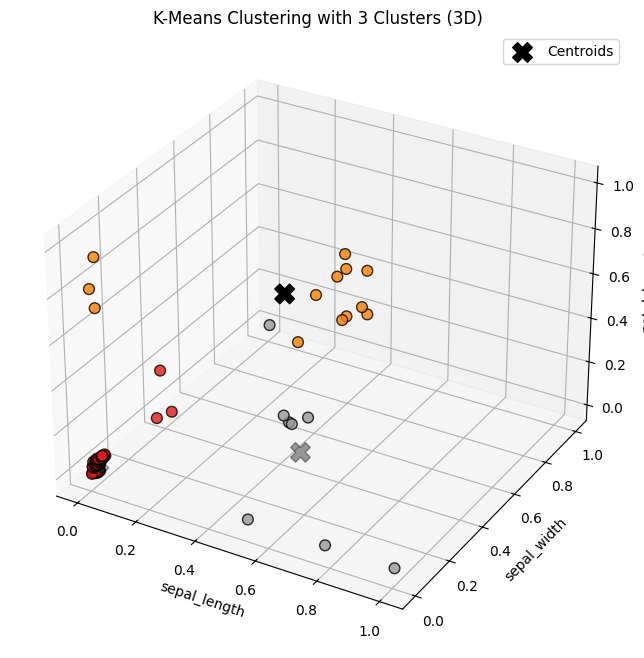

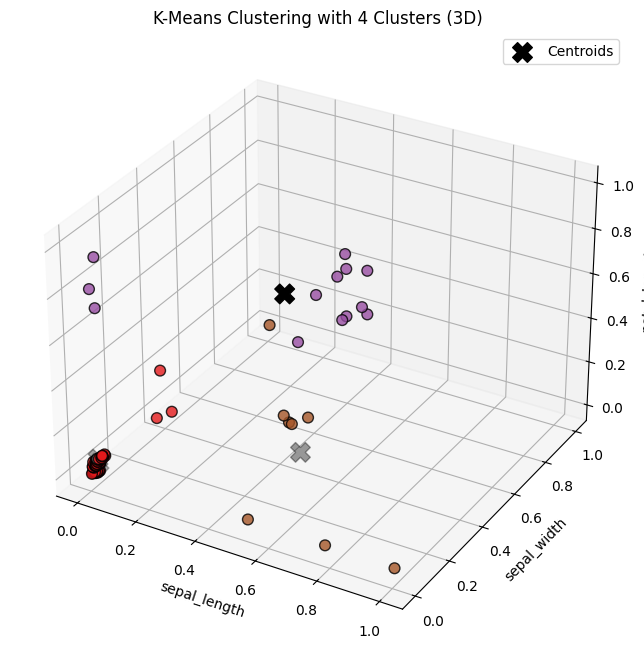

In [ ]:
#Menggunakan 3 DIMENSI

from mpl_toolkits.mplot3d import Axes3D  # Untuk plotting 3D

def perform_kmeans_plot_3d(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Gunakan 3 fitur pertama: sepal_length, sepal_width, petal_length
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
               c=labels, cmap='Set1', marker='o', edgecolors='k', s=60, alpha=0.8)

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               c='black', marker='X', s=200, label='Centroids')

    ax.set_title(f"K-Means Clustering with {k} Clusters (3D)")
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.legend()
    plt.show()

for k in [2, 3, 4]:
    perform_kmeans_plot_3d(X_scaled, k)

In [ ]:
print(X_scaled)

[[0.5206243  0.35869565 0.22033898 0.04534606]
 [0.49832776 0.30434783 0.22033898 0.04534606]
 [0.47603122 0.32608696 0.20338983 0.04534606]
 [0.46488294 0.31521739 0.23728814 0.04534606]
 [0.00780379 0.36956522 0.22033898 0.04534606]
 [0.0122631  0.02065217 0.01186441 0.0071599 ]
 [0.00334448 0.01521739 0.00677966 0.00477327]
 [0.00780379 0.01521739 0.00847458 0.00238663]
 [0.00111483 0.00978261 0.00677966 0.00238663]
 [1.         0.01195652 0.00847458 0.        ]
 [0.0122631  0.01847826 0.00847458 0.00238663]
 [0.00557414 0.01521739 0.01016949 0.00238663]
 [0.00557414 0.01086957 0.00677966 0.        ]
 [0.         0.01086957 0.00169492 0.        ]
 [0.01672241 0.41304348 0.00338983 0.00238663]
 [0.01560758 0.02608696 0.00847458 0.0071599 ]
 [0.0122631  0.02065217 0.00508475 0.0071599 ]
 [0.00891862 0.01630435 0.00677966 0.00477327]
 [0.01560758 0.01956522 0.01186441 0.00477327]
 [0.5206243  0.01956522 0.00847458 0.00477327]
 [0.0122631  0.01521739 0.01186441 0.00238663]
 [0.00891862 

## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.20363851 -0.14015855 -0.22594879 -0.15842908]
 [ 2.85093916  1.96221965  3.16328299  2.21800714]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [ 2.1228581   2.43886518  0.43043042 -0.16819972]), Klaster: 0, Centroid: [-0.20363851 -0.14015855 -0.22594879 -0.15842908], Jarak kuadrat: 12.495, Inertia sementara: 12.495
Titik data 2 (Fitur: [ 2.01337223  2.00555106  0.43043042 -0.16819972]), Klaster: 0, Centroid: [-0.20363851 -0.14015855 -0.22594879 -0.15842908], Jarak kuadrat: 9.950, Inertia sementara: 22.445
Titik data 3 (Fitur: [ 1.90388635  2.17887671  0.35676862 -0.16819972]), Klaster: 0, Centroid: [-0.20363851 -0.14015855 -0.22594879 -0.15842908], Jarak kuadrat: 10.159, Inertia sementara: 32.604
Titik data 4 (Fitur: [ 1.84914342  2.09221389  0.50409221 -0.16819972]), Klaster: 0, Centroid: [-0.20363851 -0.14015855 -0.22594879 -0.15842908], Jarak kuadrat: 9.730, Inertia sementara: 42.335
Titi

## **Model Plotting Diagram Elbow Method**

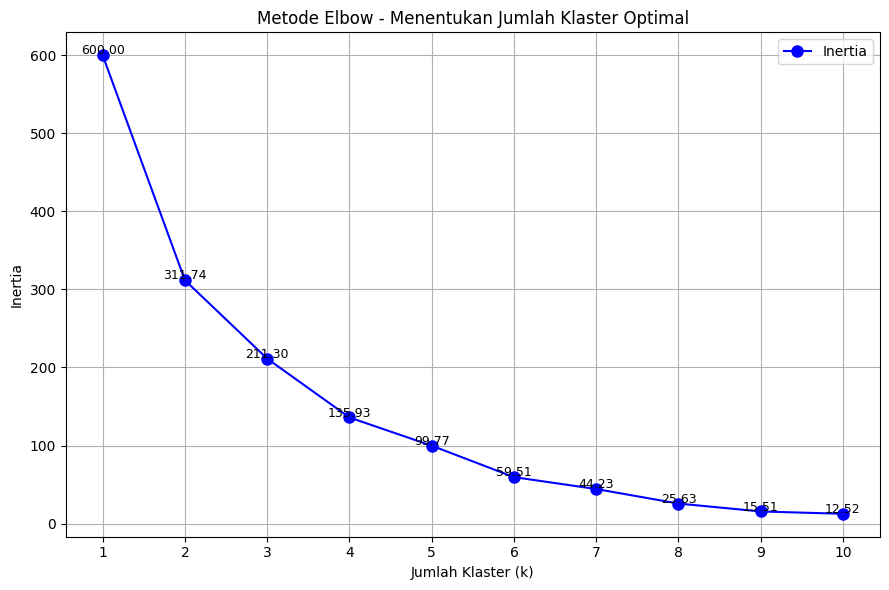

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.20363851 -0.14015855 -0.22594879 -0.15842908]
 [ 2.85093916  1.96221965  3.16328299  2.21800714]]
Silhouette Score untuk 2 klaster: 0.796

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.34755702 -0.33079677 -0.23971791 -0.23892785]
 [ 2.3185641   1.57512571  2.60161181  2.82089167]
 [ 1.48336107  2.10088017 -0.07046978 -0.31880571]]
Silhouette Score untuk 3 klaster: 0.799

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.34791656 -0.33097495 -0.24018422 -0.26723297]
 [ 2.85093916  1.96221965  3.16328299  2.21800714]
 [ 1.48336107  2.10088017 -0.07046978 -0.31880571]
 [-0.32962547 -0.34301146 -0.19815023  4.999382  ]]
Silhouette Score untuk 4 klaster: 0.825

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 4 (dengan score = 0.825)


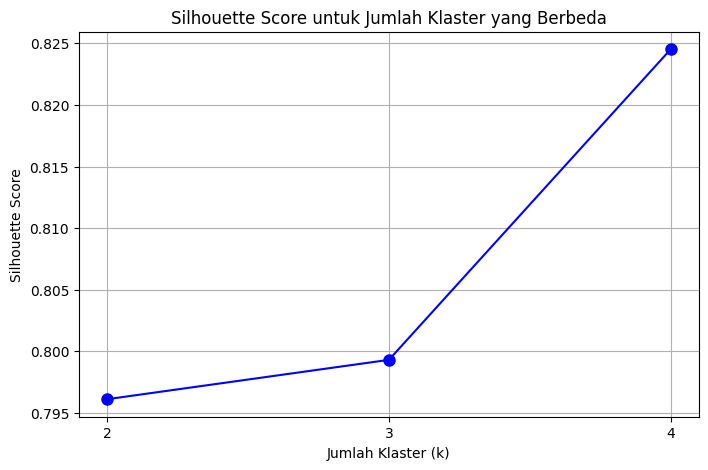

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()